# Imports

In [3]:
from pyiron_workflow import Workflow
from pyiron_nodes.atomistic.thermodynamics.landau.phases import LinePhase, IdealSolution, TemperatureLinePhase, PhasesFromDataFrame
from pyiron_nodes.atomistic.thermodynamics.landau.calc import CalcPhaseDiagram
from pyiron_nodes.atomistic.thermodynamics.landau.plot import TransitionTemperature, PlotConcPhaseDiagram, PlotMuPhaseDiagram, PlotIsotherms, PlotPhiMuDiagram, CheckTemperatureInterpolation
from pyiron_nodes.utilities.utilities import List5, Linspace, ReadDataFrame, GetItem

In [4]:
from pyironflow import PyironFlow

# Melting Point

In [29]:
wf = Workflow('LANDAU_Melting', delete_existing_savefiles=True)
wf.liquid = LinePhase("liquid", concentration=0.0, energy=2.50, entropy=1e-4)
wf.solid = LinePhase("solid", concentration=0.0, energy=2.45, entropy=2e-5)
wf.melting = TransitionTemperature(wf.liquid, wf.solid, Tmin=300, Tmax=1000)

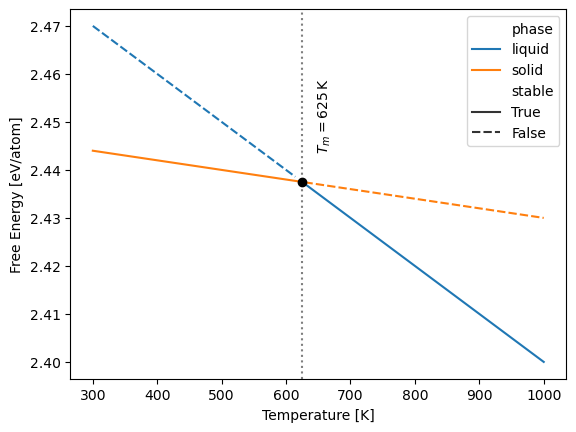

624.9999999999986

In [30]:
wf.melting.pull()

In [7]:
pf = PyironFlow([wf])
pf.gui

# Binary Phase Diagram

In [8]:
import numpy as np

In [9]:
wf = Workflow('LANDAU_BinaryPhaseDiagram', delete_existing_savefiles=True)
wf.liquid_a = LinePhase("liquid_a", 0.0, 2.50, 1e-4)
wf.liquid_b = LinePhase("liquid_b", 1.0, 3.10, 2e-4)
wf.liquid = IdealSolution("liquid", wf.liquid_a, wf.liquid_b)
wf.solid_a = LinePhase("solid_a", 0.0, 2.45, 1e-5)
wf.solid_b = LinePhase("solid_b", 1.0, 2.95, 1e-5)
wf.phases = List5(wf.liquid, wf.solid_a, wf.solid_b)
wf.linspace = Linspace(250, 1000, 25)
wf.phasedata = CalcPhaseDiagram(wf.phases, wf.linspace, chemical_potentials=50)
wf.PhaseDiagram = PlotConcPhaseDiagram(wf.phasedata, plot_samples=True, plot_isolines=False)
wf.MuPhasediagram = PlotMuPhaseDiagram(wf.phasedata)
wf.Isotherms = PlotIsotherms(wf.phasedata)

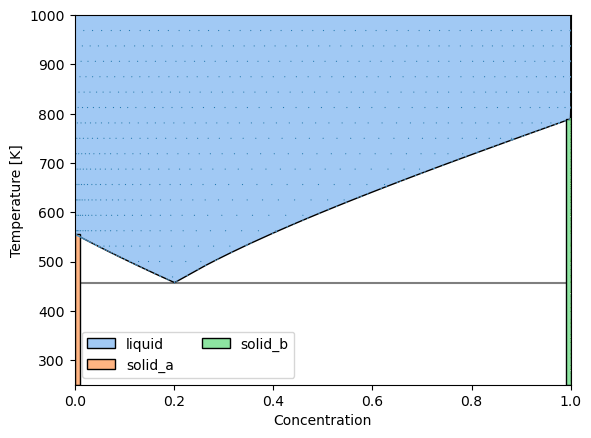

In [10]:
wf.PhaseDiagram.pull()

In [11]:
pf = PyironFlow([wf])
pf.gui

# Mg/Ca

https://github.com/eisenforschung/mgalca-mtp-data

In [12]:
import numpy as np
import pandas as pd
import landau

In [13]:
import matplotlib.pyplot as plt

In [14]:
import seaborn as sns

## Melting Point of Intermetallic

In [31]:
wf = Workflow("LANDAU_Mg2Ca", delete_existing_savefiles=False)
if not wf.has_saved_content():
    wf.ReadDataFrame = ReadDataFrame("data/MgCaFreeEnergies.pckl.gz", "gzip")
    wf.Phases = PhasesFromDataFrame(wf.ReadDataFrame, concentration_parameters=None)
    wf.Intermetallic = GetItem(wf.Phases.outputs.phase_dict, "Mg$_2$Ca")
    wf.Liquid = GetItem(wf.Phases.outputs.phase_dict, "liquid_0.333")
    wf.Melting = TransitionTemperature(wf.Intermetallic, wf.Liquid, Tmin=500, Tmax=1200)

In [32]:
pf = PyironFlow([wf])
pf.gui

In [33]:
wf.save()

## Phasediagram

In [18]:
wf = Workflow("LANDAU_MgCa_Phasediagram", delete_existing_savefiles=False)
if not wf.has_saved_content():
    wf.ReadDataFrame = ReadDataFrame("data/MgCaFreeEnergies.pckl.gz", "gzip")
    wf.Phases = PhasesFromDataFrame(wf.ReadDataFrame, temperature_parameters=4)
    wf.Temperatures = Linspace(200, 1200, 50)
    wf.phasedata = CalcPhaseDiagram(wf.Phases.outputs.phase_list, wf.Temperatures, chemical_potentials=50)
    wf.PhaseDiagram = PlotConcPhaseDiagram(wf.phasedata, plot_samples=True, plot_isolines=False)
    wf.MuPhaseDiagram = PlotMuPhaseDiagram(wf.phasedata)
    wf.Isotherm = PlotIsotherms(wf.phasedata)

Found phases:
Mg$_2$Ca
bcc Ca
fcc Ca
hcp Mg
liquid


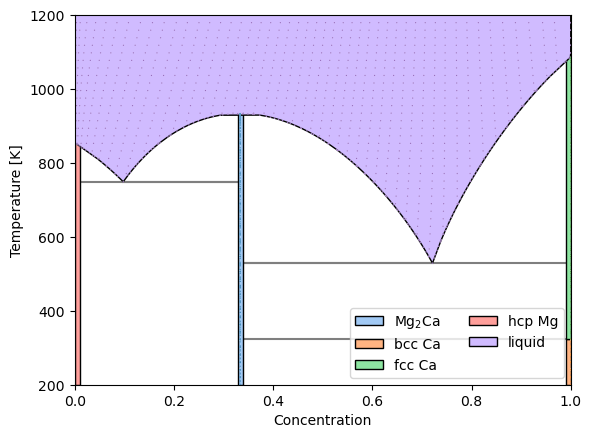

In [19]:
wf.PhaseDiagram.pull()

In [20]:
PyironFlow([wf]).gui

In [21]:
wf.save()